In [1]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F
import torch
from torch import optim
import random
import time
from utils import load_1d_data
from utils import load_2d_data
from utils import draw
from utils import table_draw


In [2]:
class CNNAutoencoder(nn.Module):
    def __init__(self):
        super(CNNAutoencoder, self).__init__()
       
        # Encoder
        self.conv1 = nn.Conv2d(1, 16, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 4, 3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
       
        # Decoder
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)

        self.criterion = nn.MSELoss()

        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        return

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.t_conv1(x))
        x = F.sigmoid(self.t_conv2(x))

        return x

    def SGD(self, train_set, batch_size, num_epoche, eta, momentum, show=False):
        train_set = train_set.to(self.device)
        self.to(self.device)

        optimizer = optim.SGD(self.parameters(), lr=eta, momentum=momentum)
        num_set = train_set.size()[0]
        
        for epoch in range(num_epoche):
            tic = time.time()

            perm = perm = torch.randperm(num_set)
            for j in range(0, num_set, batch_size):
                indices = perm[j:j + batch_size]

                optimizer.zero_grad()
                out = self.forward(train_set[indices])
                loss = self.criterion(out, train_set[indices])
                loss.backward()
                optimizer.step()

            elapse = time.time() - tic

            if show is True:
                x = self.forward(train_set[:4]).detach()
                x = x.to(torch.device('cpu'))
                table_draw(x, 2, 2)

            print('epoch ' + str(epoch) + ' finished!')
            print('time usage: ' + str(elapse))

        self.to(torch.device('cpu'))


In [3]:
train_set, train_label, valid_set, valid_label, test_set, test_label = load_2d_data(40000, 0, 0)


epoch 0 finished!
time usage: 6.239309072494507
epoch 1 finished!
time usage: 5.955790042877197
epoch 2 finished!
time usage: 6.128287315368652
epoch 3 finished!
time usage: 6.006801128387451
epoch 4 finished!
time usage: 5.973599195480347
epoch 5 finished!
time usage: 5.896733999252319
epoch 6 finished!
time usage: 6.067754745483398
epoch 7 finished!
time usage: 5.827849388122559
epoch 8 finished!
time usage: 5.9945924282073975
epoch 9 finished!
time usage: 5.900281190872192
epoch 10 finished!
time usage: 6.1518542766571045
epoch 11 finished!
time usage: 6.43767237663269
epoch 12 finished!
time usage: 6.1317455768585205
epoch 13 finished!
time usage: 5.899590015411377
epoch 14 finished!
time usage: 6.303435325622559
epoch 15 finished!
time usage: 6.201571226119995
epoch 16 finished!
time usage: 6.13615083694458
epoch 17 finished!
time usage: 6.229267358779907
epoch 18 finished!
time usage: 5.865472793579102
epoch 19 finished!
time usage: 6.208226203918457


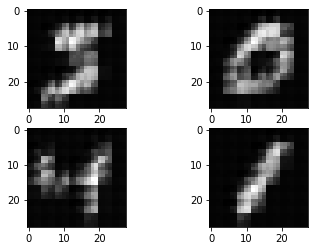

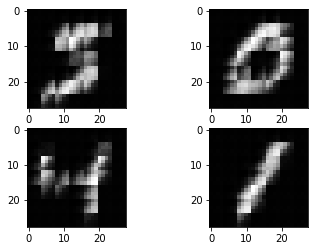

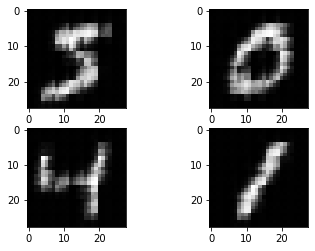

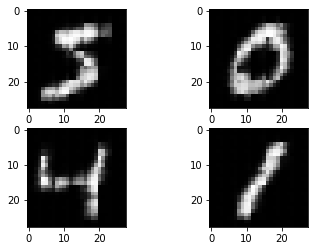

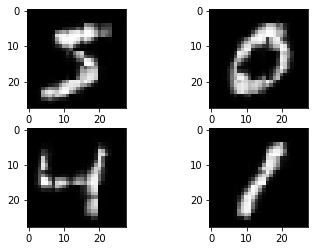

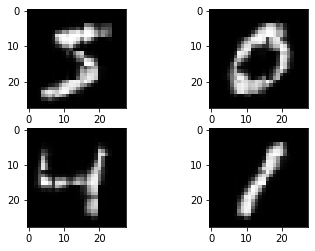

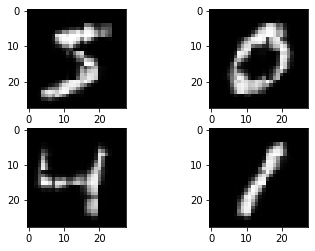

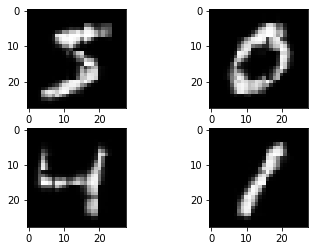

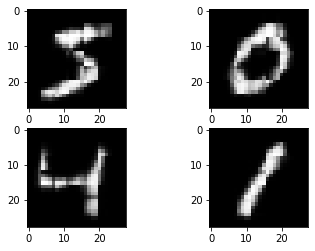

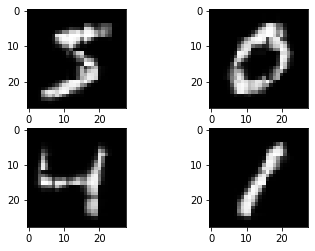

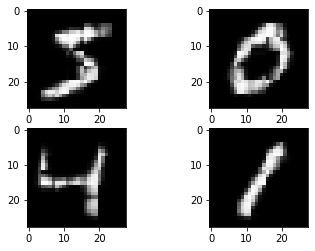

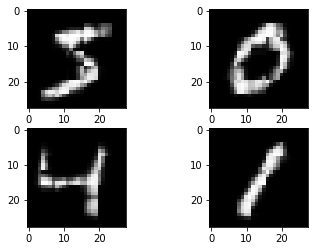

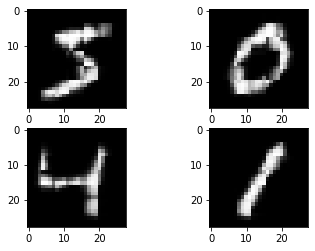

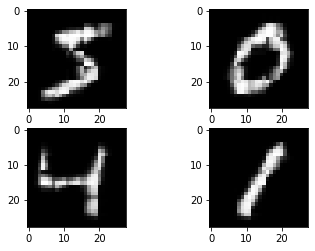

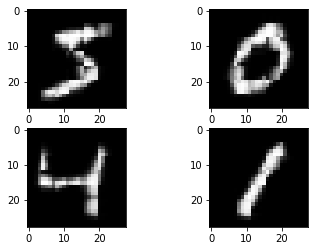

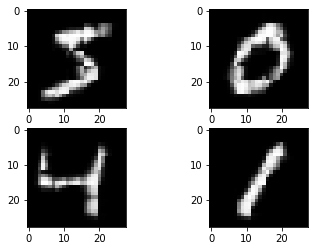

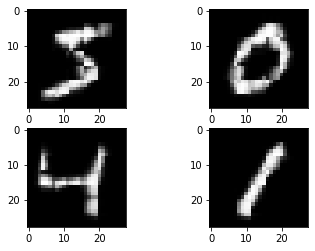

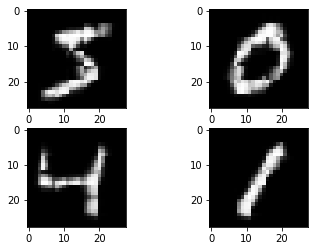

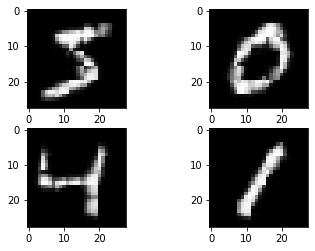

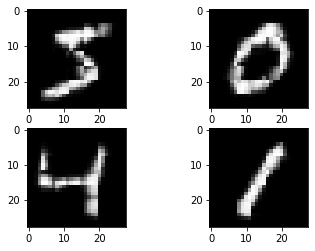

In [4]:
net = CNNAutoencoder()
net.SGD(train_set, 10, 20, 0.1, 0, True)

epoch 0 finished!
time usage: 7.0073041915893555
epoch 1 finished!
time usage: 7.041665554046631
epoch 2 finished!
time usage: 6.851085901260376
epoch 3 finished!
time usage: 6.775922060012817
epoch 4 finished!
time usage: 6.855837106704712
epoch 5 finished!
time usage: 6.667918682098389
epoch 6 finished!
time usage: 6.746078252792358
epoch 7 finished!
time usage: 6.609311103820801
epoch 8 finished!
time usage: 6.901556491851807
epoch 9 finished!
time usage: 6.845954656600952
epoch 10 finished!
time usage: 7.155518293380737
epoch 11 finished!
time usage: 6.857714891433716
epoch 12 finished!
time usage: 6.97111177444458
epoch 13 finished!
time usage: 6.8856682777404785
epoch 14 finished!
time usage: 7.043162107467651
epoch 15 finished!
time usage: 6.911491394042969
epoch 16 finished!
time usage: 6.76808500289917
epoch 17 finished!
time usage: 6.888823509216309
epoch 18 finished!
time usage: 6.712745666503906
epoch 19 finished!
time usage: 6.743616819381714
epoch 20 finished!
time usage:

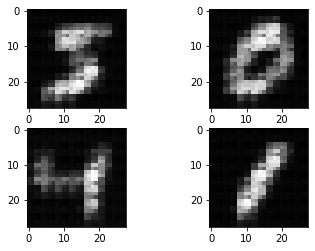

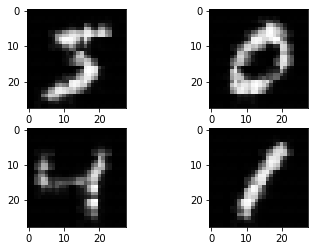

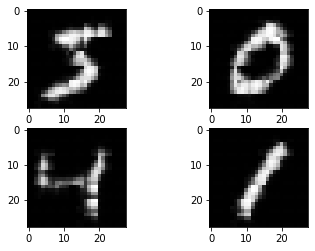

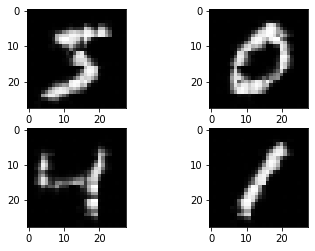

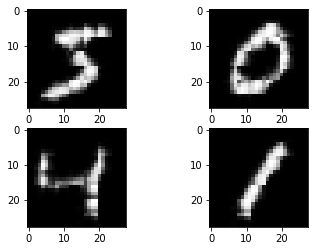

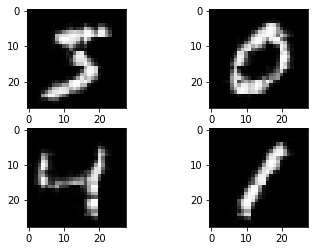

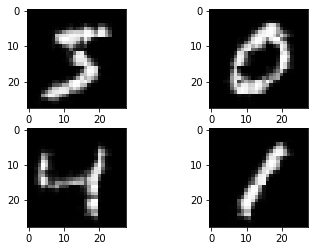

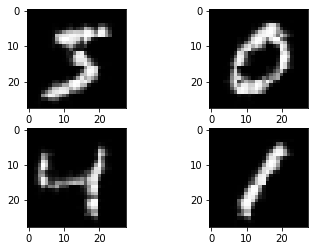

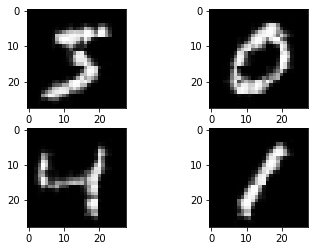

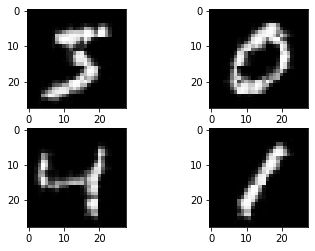

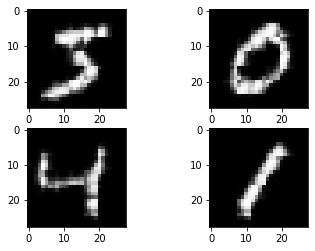

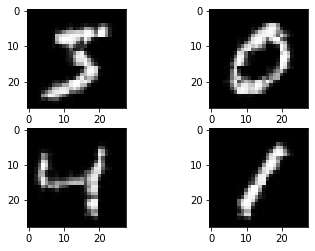

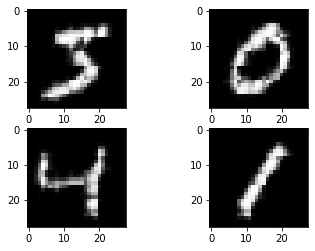

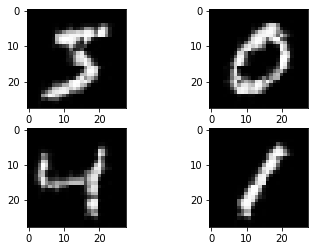

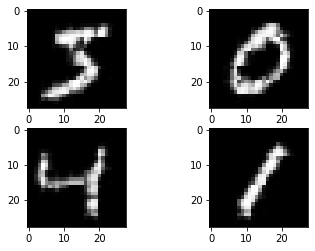

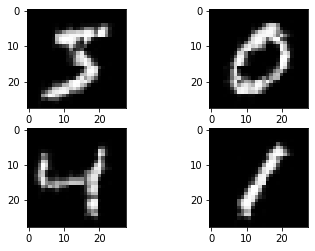

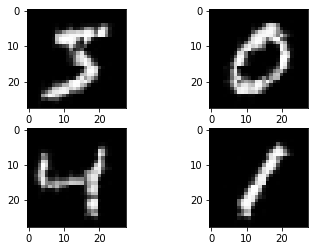

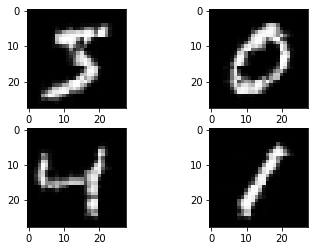

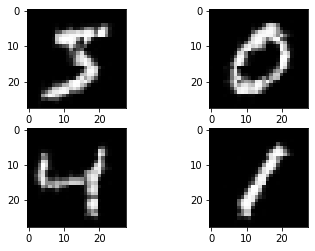

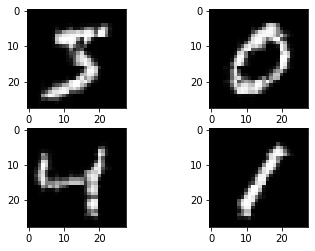

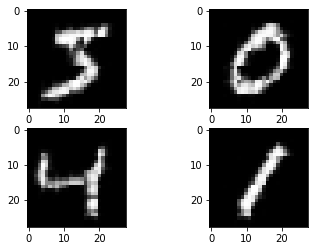

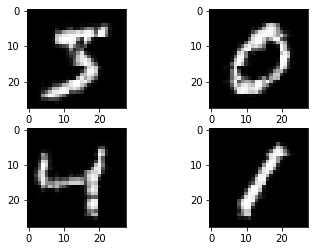

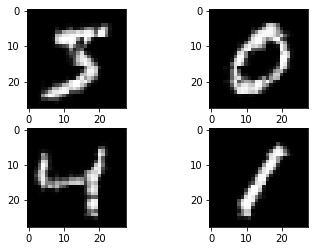

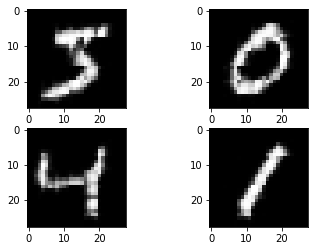

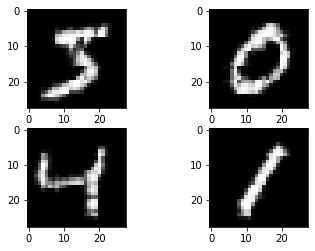

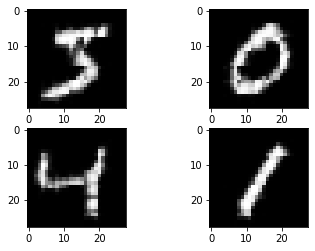

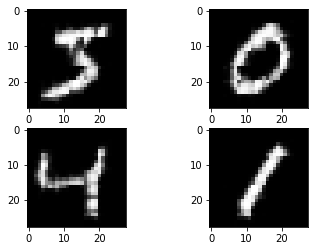

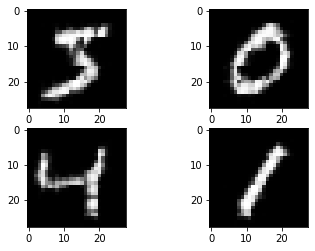

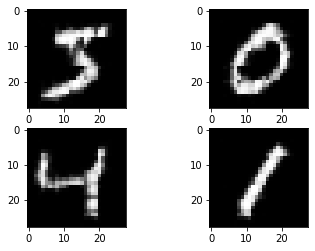

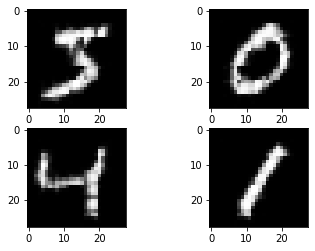

In [5]:
net = CNNAutoencoder()
net.SGD(train_set, 10, 30, 0.1, 0.1, True)

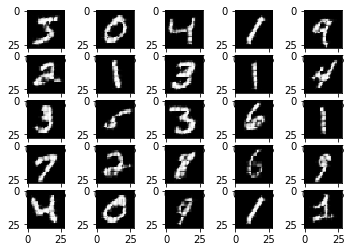

In [6]:
x = net(train_set[:25]).detach()
table_draw(x, 5, 5)

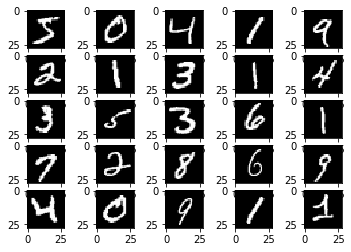

In [7]:
table_draw(train_set[:25], 5, 5)